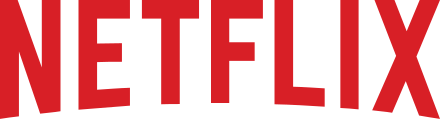

In [26]:
# pip install -U seaborn

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
netflix_overall = pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## TV Show vs Movie

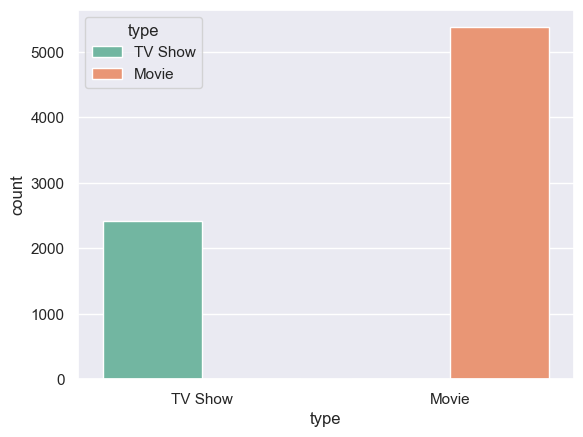

In [29]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, hue='type', palette="Set2")

## Monthly Content Update over Years 
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

In [30]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]

monthly_content = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
monthly_content

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0


In [31]:
monthly_content.to_numpy()

array([[ 0.,  0.,  1.,  7., 44., 39., 64., 50., 74.,  0.],
       [ 0.,  0.,  3.,  2., 18., 31., 41., 77., 55.,  0.],
       [ 0.,  2.,  0.,  5., 18., 32., 46., 73., 56.,  0.],
       [ 0.,  1.,  0.,  1., 19., 33., 44., 44., 62.,  0.],
       [ 0.,  1.,  0.,  0., 17., 38., 34., 53., 61.,  0.],
       [ 0.,  0.,  0.,  3., 10., 34., 30., 67., 53.,  0.],
       [ 0.,  0.,  0.,  3.,  8., 30., 28., 48., 48.,  0.],
       [ 0.,  0.,  0.,  2.,  4., 25., 28., 49., 64.,  0.],
       [ 0.,  0.,  1.,  4.,  8., 29., 31., 50., 58.,  0.],
       [ 0.,  1.,  0.,  2.,  3., 38., 38., 60., 56.,  0.],
       [ 1.,  0.,  1.,  1.,  7., 18., 24., 46., 46.,  0.],
       [ 0.,  0.,  0.,  0., 29., 14., 22., 39., 64., 29.]])

In [32]:
monthly_content.shape

(12, 10)

In [33]:
range(monthly_content.shape[1])

range(0, 10)

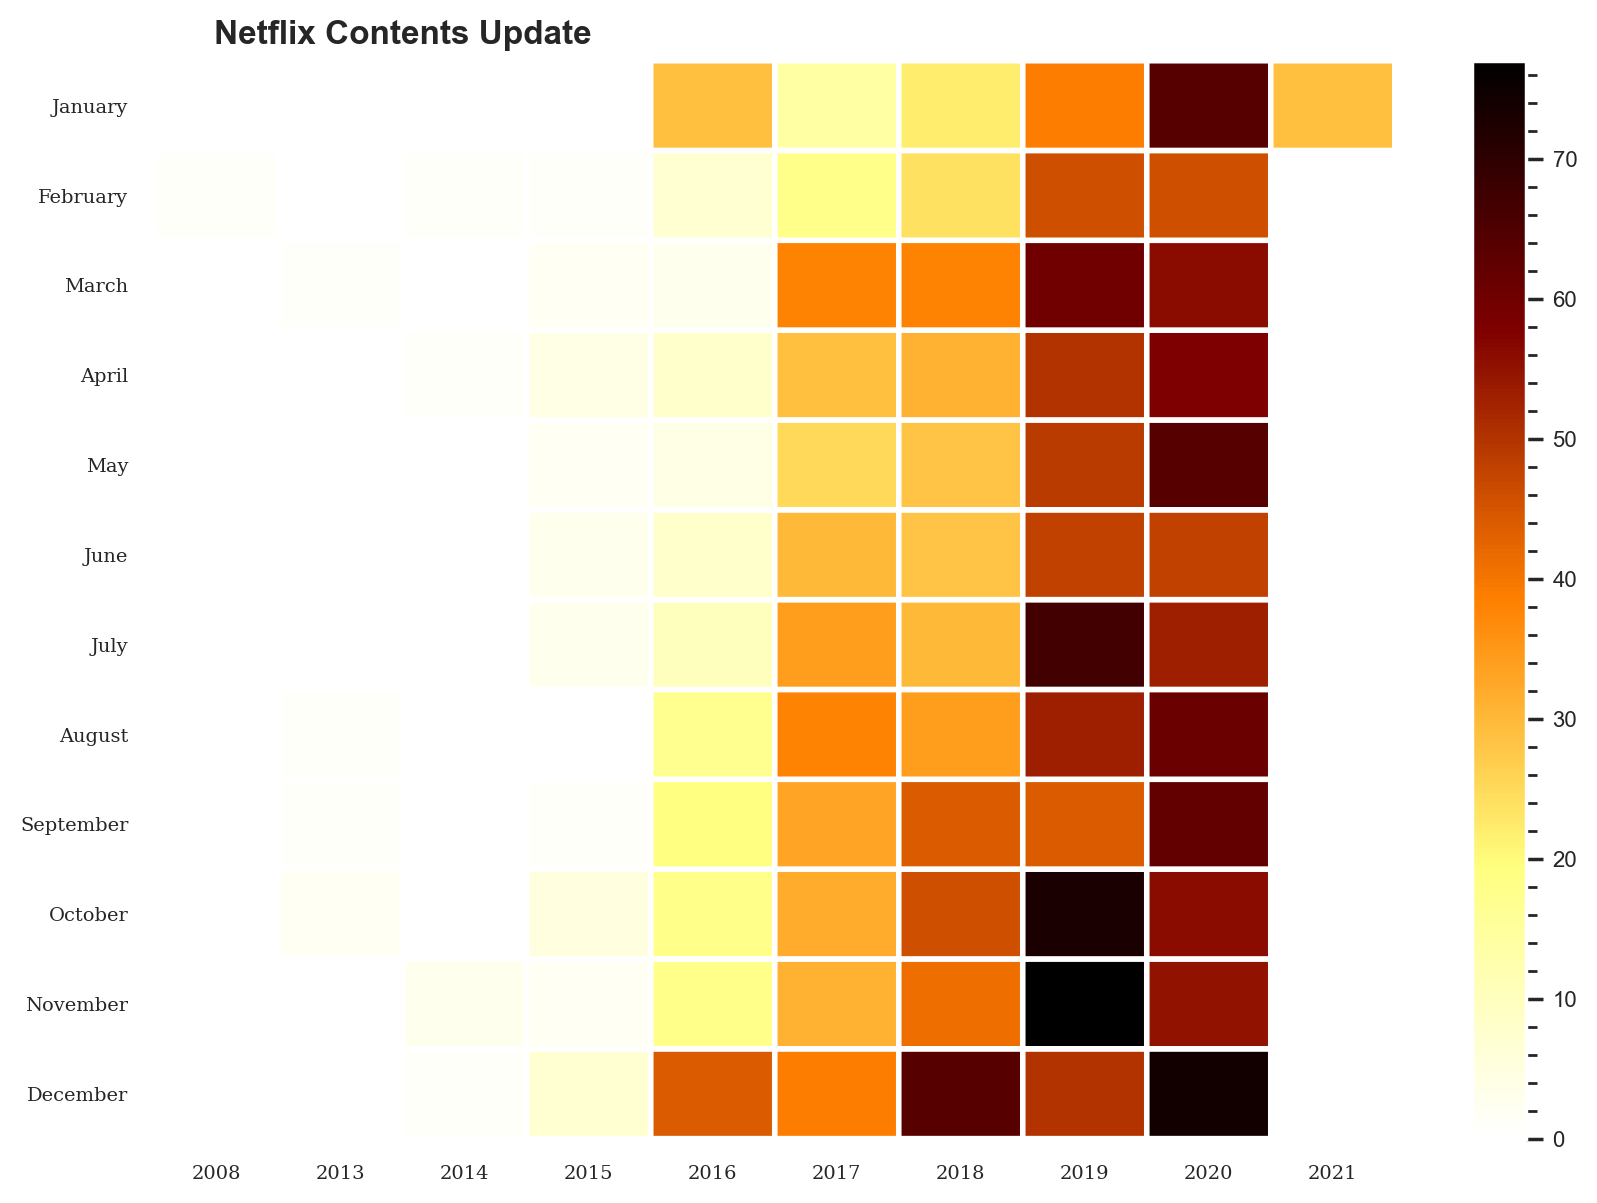

In [34]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(monthly_content, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap

plt.xticks(np.arange(0.5, len(monthly_content.columns), 1), monthly_content.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(monthly_content.index), 1), monthly_content.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()


plt.show()

### Text properties and layout
https://matplotlib.org/stable/users/explain/text/text_props.html

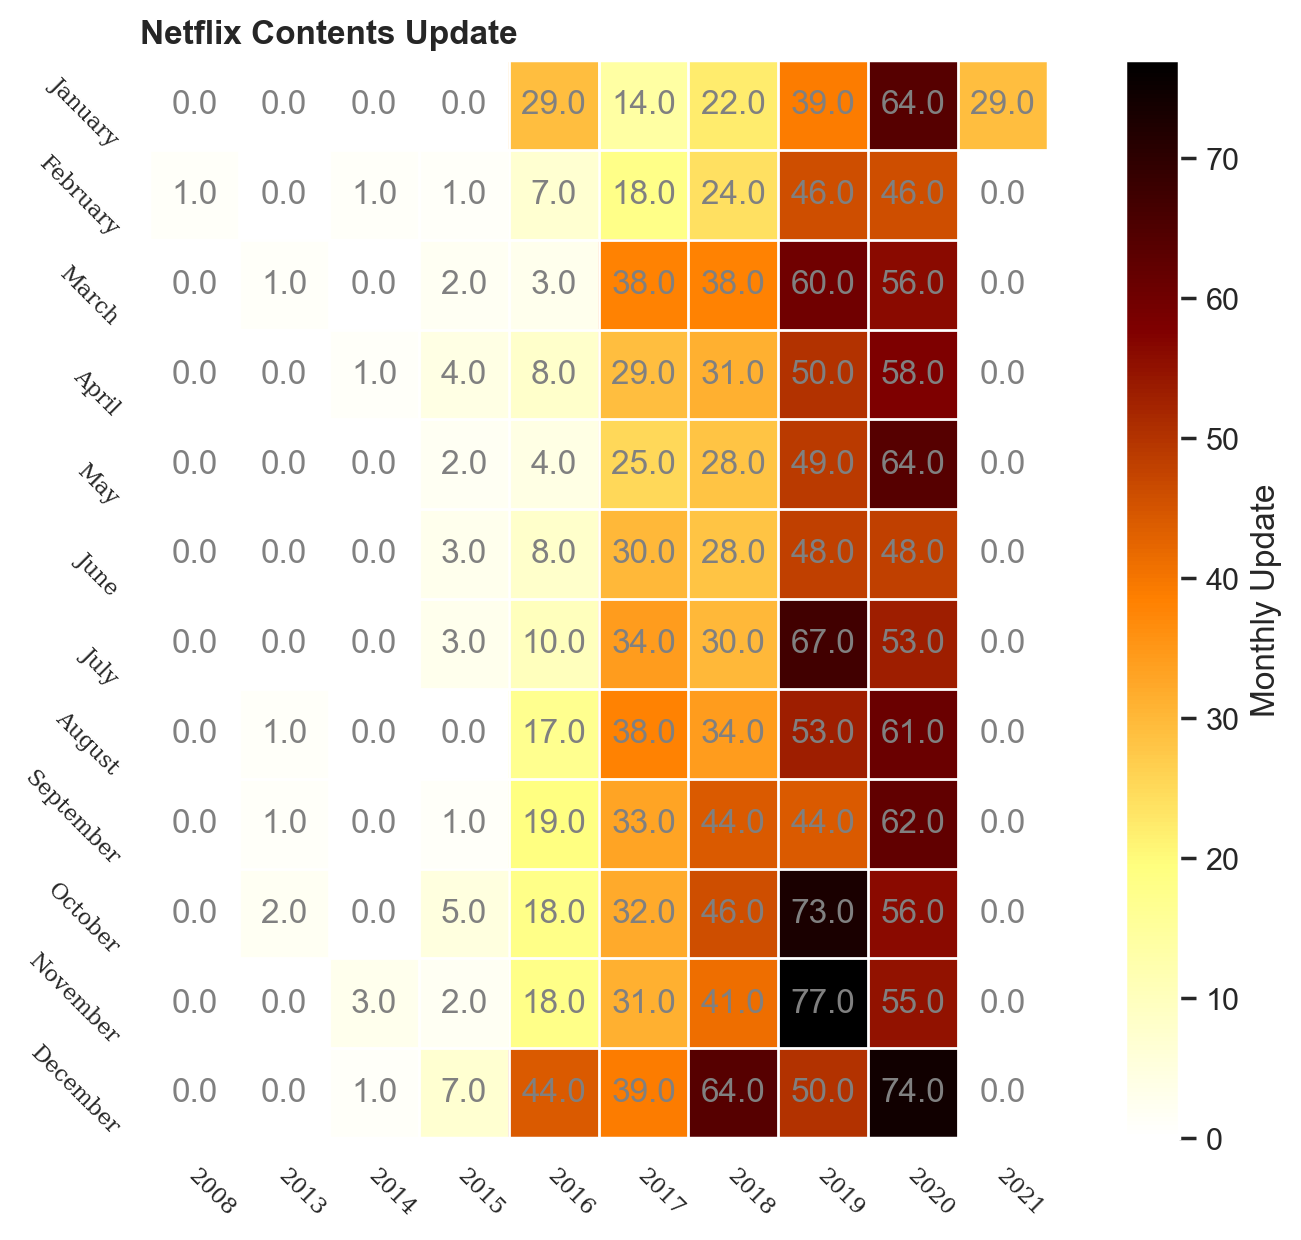

In [35]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_content = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
monthly_content

fig, ax = plt.subplots(figsize=(10, 7), dpi=200)
im = ax.imshow(monthly_content, cmap='afmhot_r')

# Loop over data dimensions and create text annotations.
for i in range(monthly_content.shape[0]):  # loop columns
    for j in range(monthly_content.shape[1]):    # loop rows
        text = ax.text(j, i, monthly_content.to_numpy()[i, j],
                       ha="center", va="center", color="grey")

plt.xticks(np.arange(0.5, len(monthly_content.columns), 1), monthly_content.columns, fontsize=3, fontfamily='serif', ha="right", rotation=315)
plt.yticks(np.arange(0.5, len(monthly_content.index), 1), monthly_content.index, fontsize=3, fontfamily='serif', va='bottom', rotation=315)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))

ax.tick_params(labelsize=8) 
#cbar.ax.minorticks_on()
fig.colorbar(im, ax=ax, label='Monthly Update')

plt.show()

## TV Rating (Parental Guideline)

In [36]:
netflix_movies['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'PG', 'G', 'TV-Y7', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

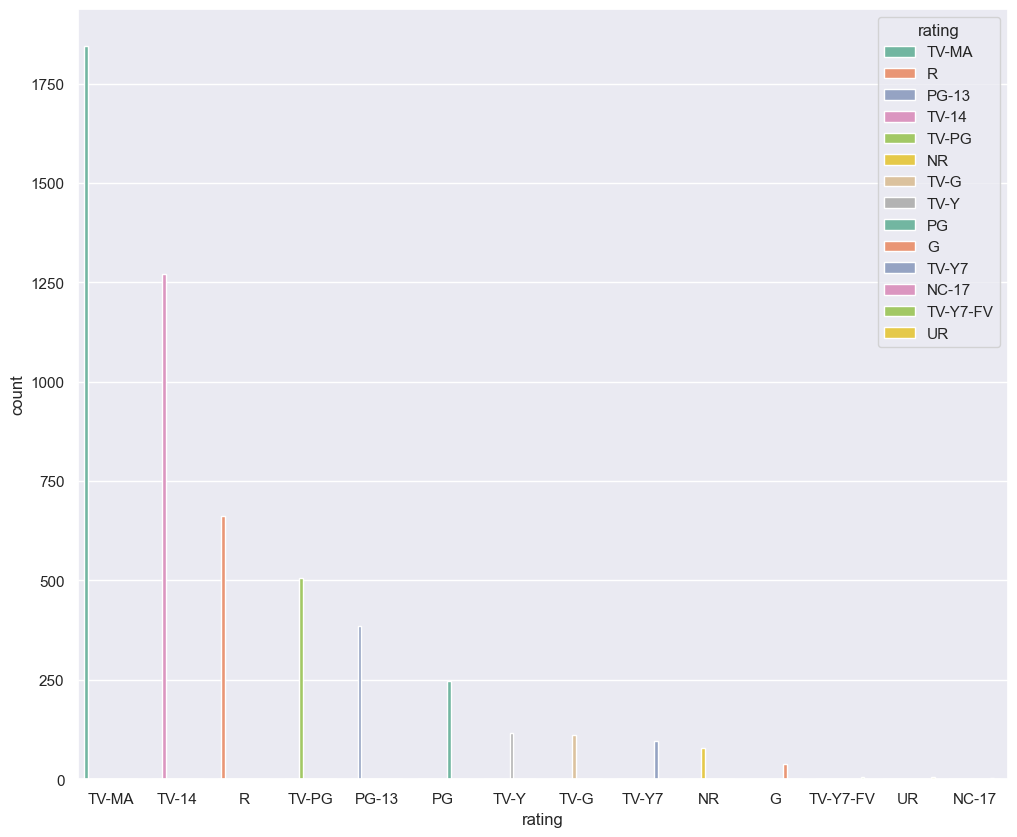

In [37]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", hue='rating',
                   order=netflix_movies['rating'].value_counts().index[0:15])

## IMDb rating and movie DF

In [38]:
imdb_ratings = pd.read_csv('IMDb_ratings.csv',usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb_movies.csv', usecols=['title','year','genre'],low_memory=False)
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [39]:
ratings.dropna()
joint_data = ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

In [40]:
joint_data.sample(3)

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1259,Mumbai Meri Jaan,2008,7.7,Drama,s4280,Movie,Mumbai Meri Jaan,Nishikant Kamat,"Madhavan, Irrfan Khan, Soha Ali Khan, Paresh R...",India,"November 1, 2018",2008,TV-MA,135 min,"Dramas, International Movies",A moving portrayal of the 2006 train bombings ...
1509,Our House,2018,5.3,"Drama, Horror, Mystery",s4694,Movie,Our House,Anthony Scott Burns,"Thomas Mann, Nicola Peltz, Percy Hynes White, ...","Canada, United States, Germany","June 1, 2020",2018,PG-13,90 min,"Horror Movies, Thrillers",A young man invents a device he hopes will gen...
1340,Battle,2011,2.0,Drama,s766,Movie,Battle,Katarina Launing,"Lisa Teige, Fabian Svegaard Tapia, Vebjørn Eng...","Norway, Denmark, Netherlands, Sweden","December 1, 2018",2018,TV-MA,98 min,"Dramas, International Movies, Romantic Movies","After Amalie's dad goes bankrupt, the young da..."


## Top rated 10 movies on Netflix

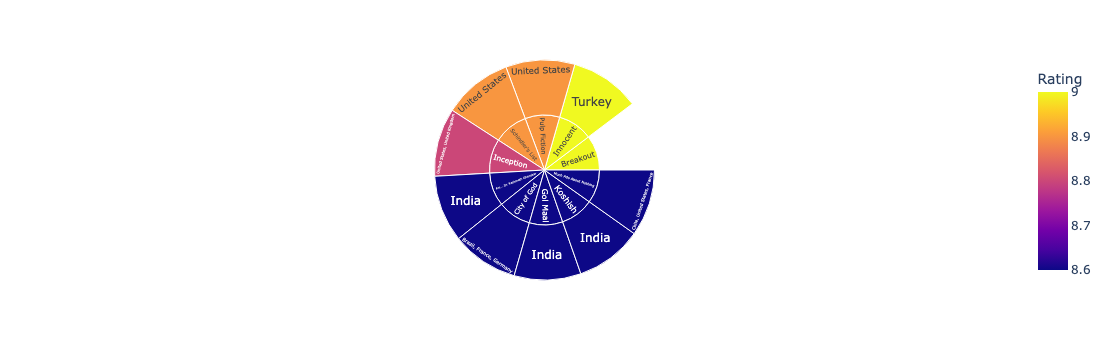

In [41]:
top_rated=joint_data[0:10]
fig =px.sunburst( top_rated, path=['title','country'], 
    values='Rating', color='Rating')
fig.show()

## Countries with highest rated content.

In [42]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


In [43]:
# Hong Kong people don't know IMDb much
country_count.loc[country_count.index=='Hong Kong']

,count
country,
Hong Kong,8


## Movies released per year

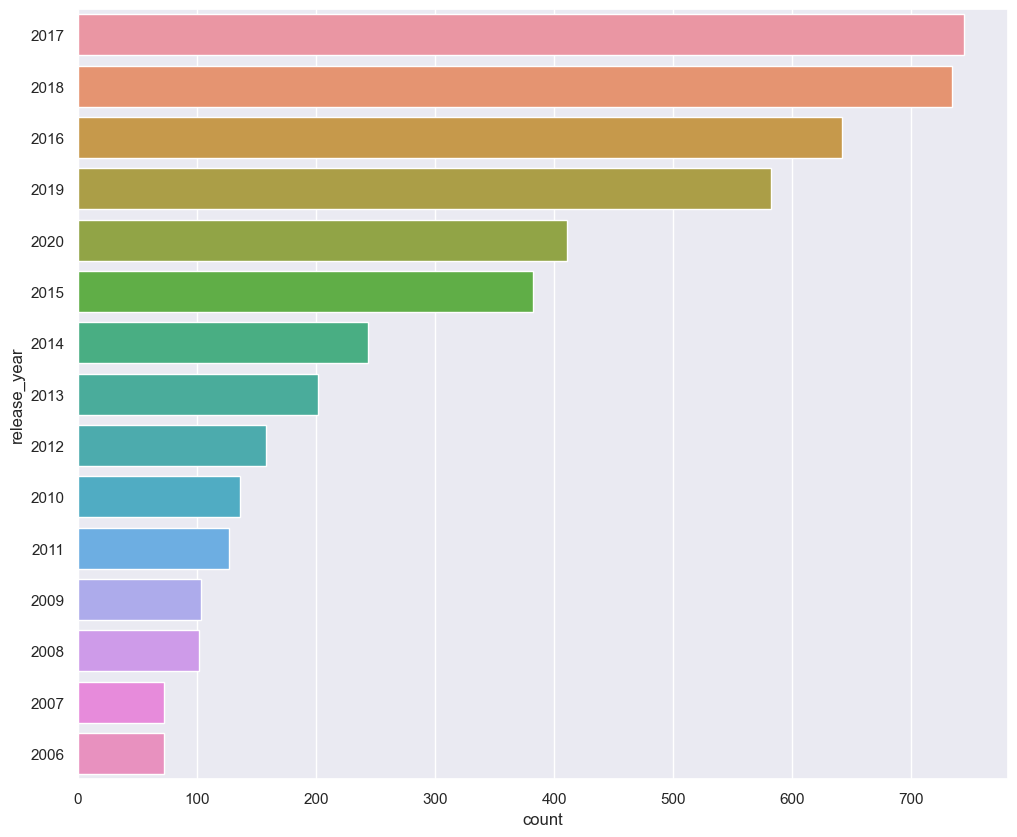

In [44]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, #palette="Set2", hue='release_year',
                   order=netflix_movies['release_year'].value_counts().index[0:15])

## Film production countries

In [45]:
# some movie was filmed and produced in a few countries
netflix_movies['country'].sample(5)

1457                South Africa
430                  Philippines
650                United States
3500    United States, Argentina
207                United States
Name: country, dtype: object

In [46]:
countries={}
netflix_movies.loc[netflix_movies.index, ['country']] = netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [47]:
countries

{'Mexico': 1,
 'Singapore': 3,
 'United States': 1,
 'Egypt': 1,
 'India': 1,
 'Thailand': 1,
 'Nigeria': 1,
 'Norway': 2,
 ' Iceland': 4,
 ' United States': 331,
 'United Kingdom': 2,
 'South Korea': 1,
 'Italy': 1,
 'Canada': 3,
 'Indonesia': 1,
 'Romania': 3,
 'Spain': 1,
 'Turkey': 1,
 'Iceland': 1,
 'South Africa': 1,
 ' Nigeria': 5,
 'France': 4,
 ' South Africa': 14,
 'Portugal': 2,
 ' Spain': 39,
 'Unknown': 1,
 'Hong Kong': 1,
 ' China': 54,
 ' Singapore': 8,
 ' Germany': 89,
 'Argentina': 2,
 ' France': 128,
 ' Serbia': 4,
 'Germany': 3,
 'Denmark': 2,
 ' Poland': 9,
 'Poland': 1,
 'Japan': 2,
 'Kenya': 2,
 'New Zealand': 2,
 ' United Kingdom': 126,
 'Pakistan': 1,
 'Australia': 1,
 'China': 1,
 ' Hong Kong': 23,
 'Taiwan': 1,
 ' South Korea': 13,
 ' Japan': 28,
 ' Canada': 111,
 'Netherlands': 1,
 ' Denmark': 12,
 ' Netherlands': 17,
 'Philippines': 1,
 'United Arab Emirates': 2,
 'Brazil': 1,
 'Iran': 1,
 ' Belgium': 68,
 ' Brazil': 7,
 'Israel': 1,
 ' Mexico': 22,
 'Urugua

In [48]:
countries_fin = {}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

In [49]:
countries_fin

{'UnitedStates': 332,
 'France': 132,
 'UnitedKingdom': 128,
 'Canada': 114,
 'Germany': 92,
 'Belgium': 69,
 'China': 55,
 'Spain': 40,
 'India': 33,
 'Japan': 30,
 'Australia': 29,
 'Italy': 26,
 'HongKong': 24,
 'Mexico': 23,
 'Sweden': 22,
 'Netherlands': 18,
 'UnitedArabEmirates': 17,
 'Argentina': 16,
 'SouthAfrica': 15,
 'SouthKorea': 14,
 'Denmark': 14,
 'CzechRepublic': 14,
 'Switzerland': 12,
 'Singapore': 11,
 'Norway': 11,
 'Poland': 10,
 'Luxembourg': 10,
 'NewZealand': 9,
 'Ireland': 9,
 'Brazil': 8,
 'Chile': 8,
 'Russia': 8,
 'Greece': 8,
 'Serbia': 7,
 'Israel': 7,
 'Uruguay': 7,
 'Jordan': 7,
 'Finland': 7,
 'Lebanon': 7,
 'Qatar': 7,
 'Nigeria': 6,
 'Peru': 6,
 'Morocco': 6,
 'Egypt': 5,
 'Thailand': 5,
 'Iceland': 5,
 'Romania': 5,
 'Bulgaria': 5,
 'Colombia': 5,
 'Hungary': 5,
 'Indonesia': 4,
 'Portugal': 4,
 'Kenya': 4,
 'Taiwan': 4,
 'Philippines': 4,
 'Iran': 4,
 'Austria': 4,
 '': 4,
 'Cambodia': 4,
 'Turkey': 3,
 'Pakistan': 3,
 'SovietUnion': 3,
 'Malaysia':

## Top 10 Movie Production Countries

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



ConversionError: Failed to convert value(s) to axis units: ['UnitedStates', 'France', 'UnitedKingdom', 'Canada', 'Germany', 'Belgium', 'China', 'Spain', 'India', 'Japan']

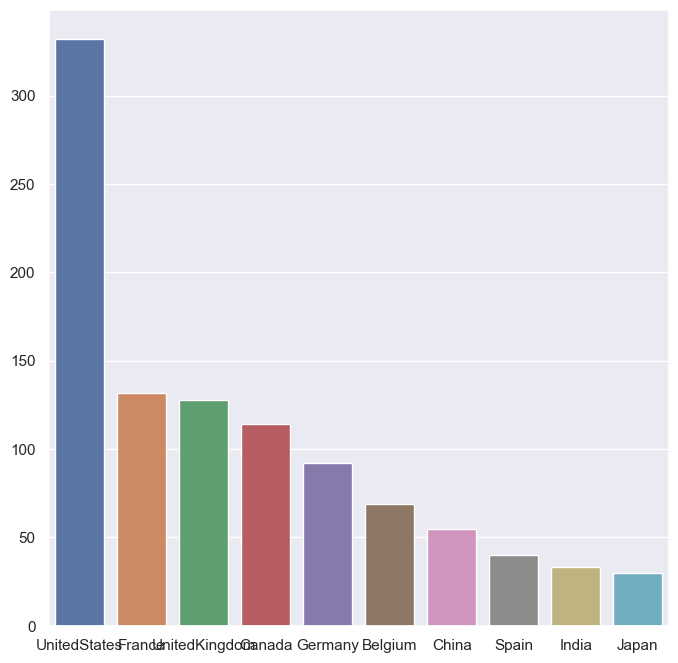

In [50]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10], y=list(countries_fin.values())[0:10])
ax.xaxis.set_ticks(list(countries_fin.keys())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation = 90)
ax.set_title('Top 10 Movie Production Countries', fontsize=20)
#color = ['lightblue', 'lightgrey']

## Duration of movie

In [ ]:
netflix_movies['duration']

In [ ]:
netflix_movies.loc[netflix_movies.index,['duration']] = netflix_movies['duration'].map(
                                                            lambda x: int(x.split("min")[0])) 
netflix_movies['duration']

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], fill=True)

In [ ]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

fig, ax = plt.subplots(figsize=(15,8))

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.xaxis.set_ticks(list(g.keys()))
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres")

## Analysis of TV SERIES on Netflix

In [ ]:
countries1={}
netflix_shows.loc[netflix_shows.index,['country']]=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [ ]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Content creating countries")
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))
plt.ylabel("Arrival delay (in minutes)")

## TV shows with largest number of seasons

In [ ]:
features=['title','duration']
durations = netflix_shows[features]
durations.loc[durations.index,['no_of_seasons']]=durations['duration'].str.replace(' Season','')
durations.loc[durations.index,['no_of_seasons']]=durations['no_of_seasons'].str.replace('s','')
durations.loc[durations.index,['no_of_seasons']]=durations['no_of_seasons'].astype(str).astype(int)

In [ ]:
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons', ascending=False)
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue',figsize=(15,10))

## Lowest number of seasons

In [ ]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

In [ ]:
bottom

## Content in Hong Kong

In [ ]:
netflix_hk = netflix_overall[netflix_overall['country']=='Hong Kong']
nfhk = netflix_hk.dropna()

fig = px.treemap(nfhk, path=['country','director'],
                  color='director', hover_data=['director','title'],
                 color_continuous_scale='Purples')
fig.show()

In [ ]:
newest_HK_series = netflix_hk.sort_values(by='release_year', ascending=False)[0:20]
newest_HK_series

## Latest release

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_HK_series['title'],newest_HK_series['release_year']]))
                     ])
fig.show()